In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.empty((100, 2))
X[: ,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)

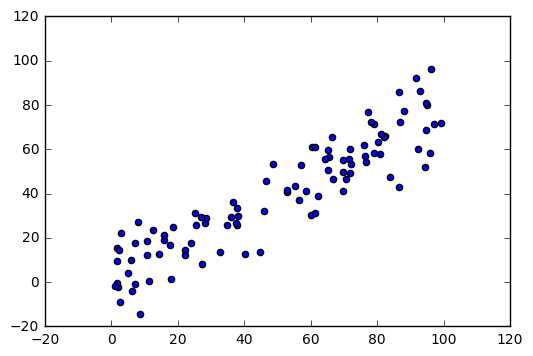

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [14]:
def demean(X):
    return X - np.mean(X, axis=0)

In [15]:
X_demean = demean(X)

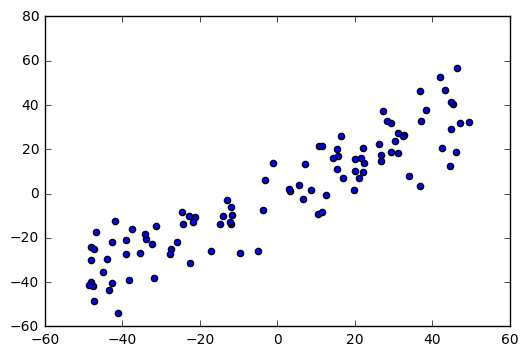

In [17]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

### 梯度上升法

In [18]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

In [19]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X) # w = 0,求导一直为0，所以初始的时候不能为w不能为 0 向量

In [28]:
def df_debug(w, X_b, epsilon = 0.01): # 测试计算是否正确，用该函数可以进行比较。 
    res = np.empty(len(w))
    for i in range(len(w)):
        w1 = w.copy()
        w1[i] += epsilon
        w2 = w.copy()
        w2[i] -= epsilon
        res[i] = (f(w1, X_b) - f(w2, X_b)) / (2 * epsilon)
    return res

In [30]:
def direction(w):
    return w / np.linalg.norm(w) # linalg为numpy得线性代数库，np.linalg.norm(w)求解 w 向量的模。
def gradicent_ascent(df, X, initial_w, eta, n_iter = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    while n_iter > 0:
        n_iter -= 1
        gradicent = df(w, X)
        last_w = w;
        w = w + eta * gradicent # 
        w = direction(w) ### 重置成为单位向量
        if abs(f(last_w, X) - f(w, X)) < epsilon :
            break;
    
    return w

In [31]:
initial_w = np.random.random(X.shape[1]) ### 不能从 0 向量开始
initial_w

array([0.66108378, 0.4076282 ])

In [32]:
eta = 0.01 # 学习率

In [33]:
### 不能用StandardScaler标准化的数据。PCA就是求一个轴，让我们把样本映射到那个轴之后方差最大， 一旦把样本数据标准化了，那么方差为1 ，那么方差的最大值就不存在了。无法求解最大化结果

In [34]:
gradicent_ascent(df_debug, X_demean, initial_w, eta)# 可以证明数学推导的梯度求法是正确的。

array([0.77896386, 0.62706881])

In [37]:
w = gradicent_ascent(df_math, X_demean, initial_w, eta) 

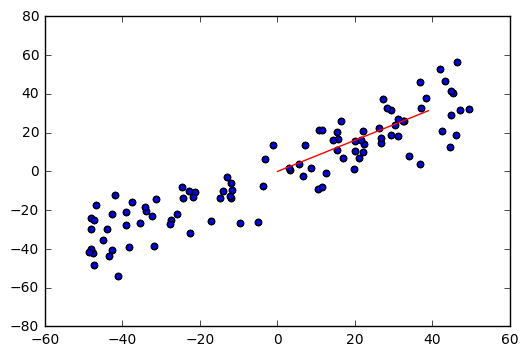

In [38]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 50], [0, w[1] * 50], color = 'r') # 该轴为第一主成分
plt.show()